In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df = pd.read_excel('.../MasterDataSheet.xlsx')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   President                           287 non-null    object        
 1   President Party                     287 non-null    int64         
 2   Congress Majority                   287 non-null    float64       
 3   observation_date                    287 non-null    datetime64[ns]
 4   PCE                                 287 non-null    float64       
 5   Year                                287 non-null    int64         
 6   Disposable Income                   287 non-null    float64       
 7   Personal Savings Rate (%of Income)  287 non-null    float64       
 8   Unemployment (%)                    287 non-null    float64       
 9   GDP                                 287 non-null    float64       
 10  CCI index                 

,President,President Party,Congress Majority,observation_date,PCE,Year,Disposable Income,Personal Savings Rate (%of Income),Unemployment (%),GDP,CCI index,Majority_Party,Job Quit Rate,Approval Rating
0,George W. Bush,0,0.0,2001-02-01,7001.8,2001,10223.4,4.6,4.2,10598.02,101.23,0.0,4.0,58.67
1,George W. Bush,0,0.0,2001-03-01,6996.7,2001,10254.4,4.9,4.3,10598.02,101.13,0.0,4.2,58.00
2,George W. Bush,0,0.0,2001-04-01,7004.2,2001,10233.1,4.8,4.4,10598.02,101.07,0.0,3.9,60.50
3,George W. Bush,0,0.0,2001-05-01,7052.8,2001,10214.7,4.3,4.3,10598.02,101.02,0.0,4.1,55.00
4,George W. Bush,0,0.0,2001-06-01,7069.7,2001,10218.1,4.2,4.5,10598.02,100.98,0.0,3.9,54.00


# EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


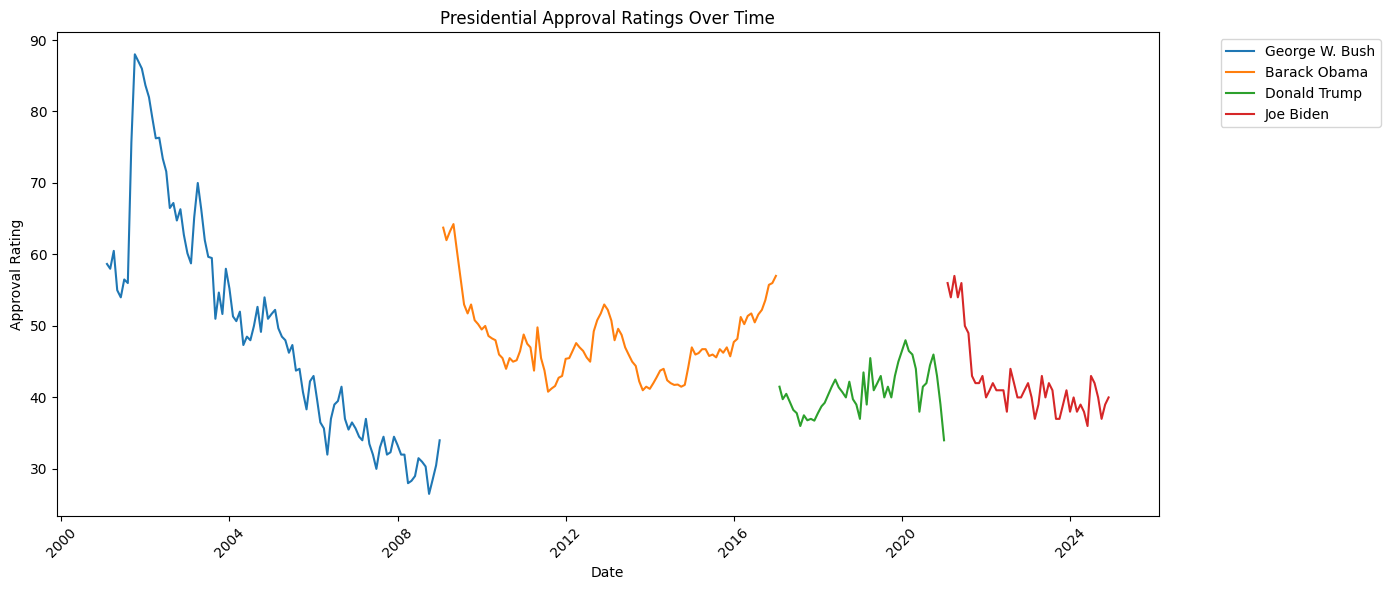

In [ ]:
#EDA
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='observation_date', y='Approval Rating', hue='President')
plt.title("Presidential Approval Ratings Over Time")
plt.xlabel("Date")
plt.ylabel("Approval Rating")
plt.xticks(rotation=45)

#move legend to blank spaceo n right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
df_corr = df.drop(columns=['President Party', 'President', 'observation_date'])

In [ ]:
df_corr

,Congress Majority,PCE,Year,Disposable Income,Personal Savings Rate (%of Income),Unemployment (%),GDP,CCI index,Majority_Party,Job Quit Rate,Approval Rating
0,0.0,7001.8,2001,10223.4,4.6,4.2,10598.02,101.23,0.0,4.0,58.67
1,0.0,6996.7,2001,10254.4,4.9,4.3,10598.02,101.13,0.0,4.2,58.00
2,0.0,7004.2,2001,10233.1,4.8,4.4,10598.02,101.07,0.0,3.9,60.50
3,0.0,7052.8,2001,10214.7,4.3,4.3,10598.02,101.02,0.0,4.1,55.00
4,0.0,7069.7,2001,10218.1,4.2,4.5,10598.02,100.98,0.0,3.9,54.00
...,...,...,...,...,...,...,...,...,...,...,...
282,0.5,19905.0,2024,17535.9,4.4,4.2,29700.58,98.95,1.0,3.4,42.00
283,0.5,20044.1,2024,17569.8,4.1,4.1,29700.58,99.02,1.0,3.5,40.00
284,0.5,20134.5,2024,17646.1,4.3,4.1,29700.58,99.09,1.0,3.4,37.00
285,0.5,20253.6,2024,17668.9,4.1,4.2,29700.58,99.10,1.0,3.4,39.00


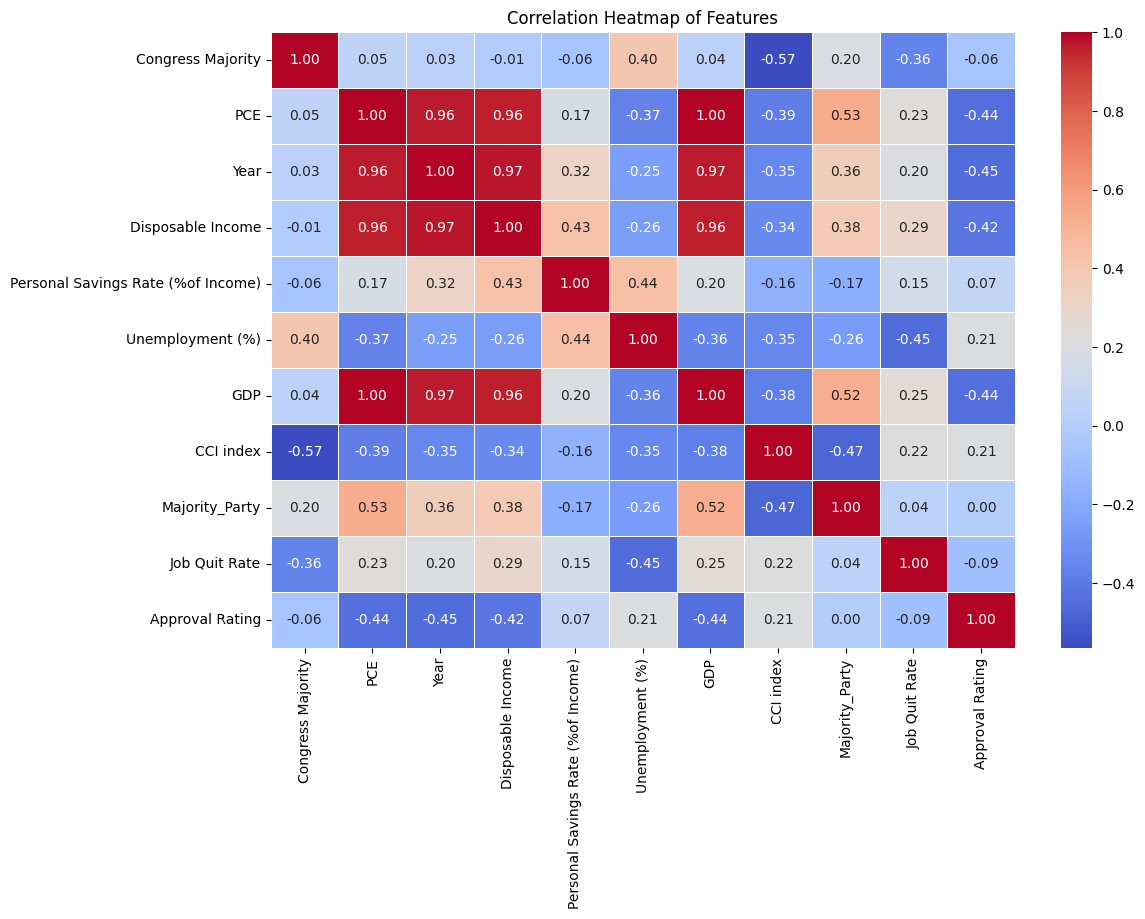

In [ ]:
corr_matrix = df_corr.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

<ipython-input-32-9a44372e7364>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='President Party Label', y='Approval Rating', palette=custom_palette)


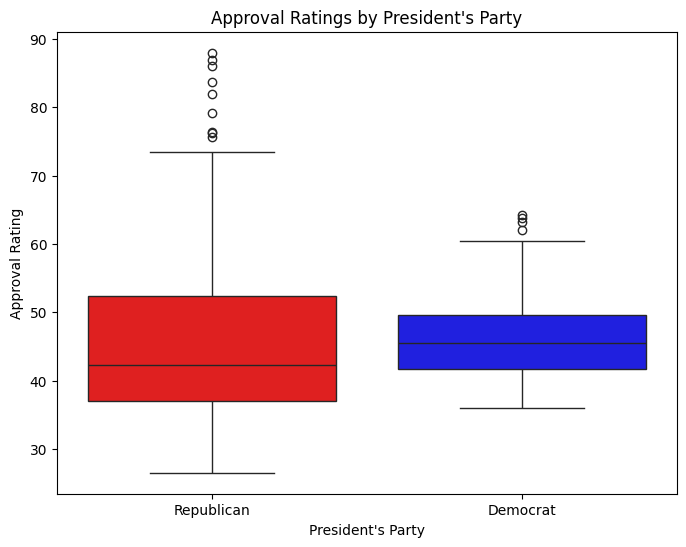

<ipython-input-32-9a44372e7364>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Congress Control', y='Approval Rating', palette=custom_palette)


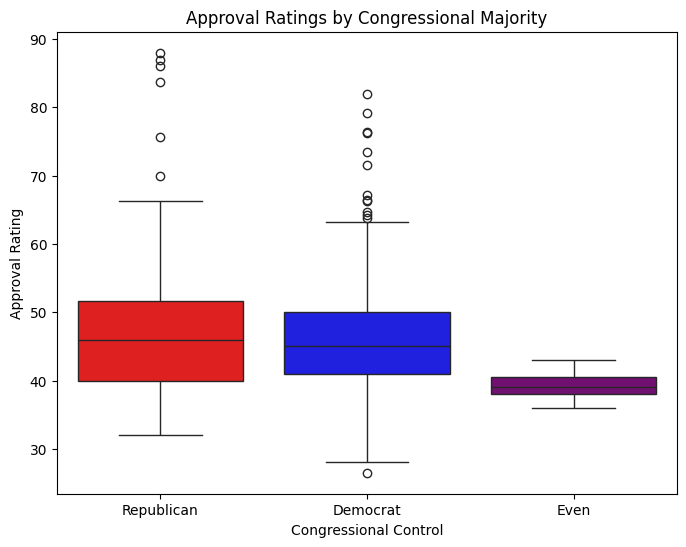

<ipython-input-32-9a44372e7364>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Public Majority', y='Approval Rating', palette=custom_palette)


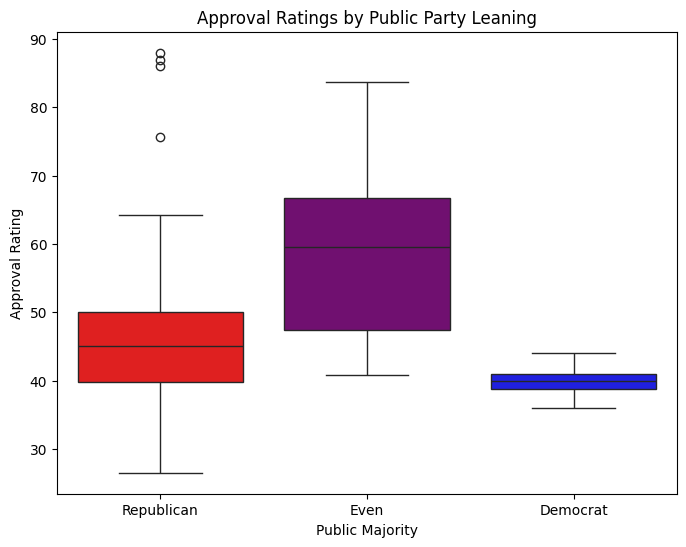

In [ ]:
#eda continued
df['President Party Label'] = df['President Party'].map({0: 'Republican', 1: 'Democrat'})
df['Congress Control'] = df['Congress Majority'].map({0: 'Republican', 1: 'Democrat', 0.5: 'Even'})
df['Public Majority'] = df['Majority_Party'].map({0: 'Republican', 1: 'Democrat', 0.5: 'Even'})

#custom colors for parties
custom_palette = {
    'Republican': 'red',
    'Democrat': 'blue',
    'Even': 'purple'
}

#president approval boxplot by party
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='President Party Label', y='Approval Rating', palette=custom_palette)
plt.title("Approval Ratings by President's Party")
plt.ylabel("Approval Rating")
plt.xlabel("President's Party")
plt.show()

#presidential approval boxplot by congressional control praty
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Congress Control', y='Approval Rating', palette=custom_palette)
plt.title("Approval Ratings by Congressional Majority")
plt.ylabel("Approval Rating")
plt.xlabel("Congressional Control")
plt.show()

#president approval boxplot by public majority
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Public Majority', y='Approval Rating', palette=custom_palette)
plt.title("Approval Ratings by Public Party Leaning")
plt.ylabel("Approval Rating")
plt.xlabel("Public Majority")
plt.show()

<ipython-input-33-a98ef85c3662>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gov Alignment', y='Approval Rating', palette={'Aligned': 'green', 'Opposed': 'gray'})


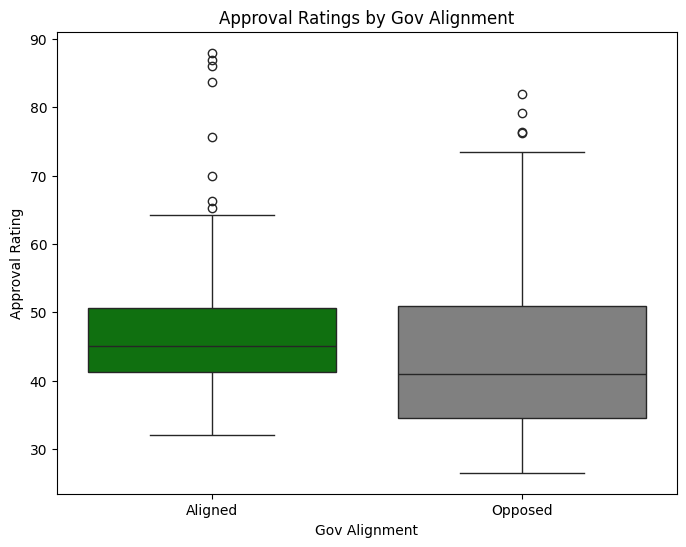

In [ ]:
df['Gov Alignment'] = (df['President Party'] == df['Congress Majority']).map({True: 'Aligned', False: 'Opposed'})

#approval ratings based on congress and president matching party
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gov Alignment', y='Approval Rating', palette={'Aligned': 'green', 'Opposed': 'gray'})
plt.title("Approval Ratings by Gov Alignment")
plt.show()


In [ ]:
#mean of major economic indicators and aggregations with approvals
summary = df.groupby('President')[[
    'Approval Rating', 'GDP', 'Unemployment (%)', 'CCI index'
]].mean().sort_values('Approval Rating', ascending=False)

summary

,Approval Rating,GDP,Unemployment (%),CCI index
President,,,,
George W. Bush,49.331042,12784.184250,5.308333,100.294792
Barack Obama,47.910937,16772.723625,7.413542,99.478125
Joe Biden,42.234043,27031.593298,4.119149,98.597660
Donald Trump,40.917708,21001.720375,5.041667,100.350417


In [ ]:
features = [
    'GDP', 'Unemployment (%)', 'Disposable Income',
    'Personal Savings Rate (%of Income)', 'CCI index', 'Job Quit Rate'
]

#constant for VIFs
X = add_constant(df[features])

#get VIF values for correlation/collinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Feature,VIF
0,const,16016.995627
1,GDP,77.533982
2,Unemployment (%),3.557110
3,Disposable Income,89.628850
4,Personal Savings Rate (%of Income),8.496670
5,CCI index,2.094761
6,Job Quit Rate,1.570146


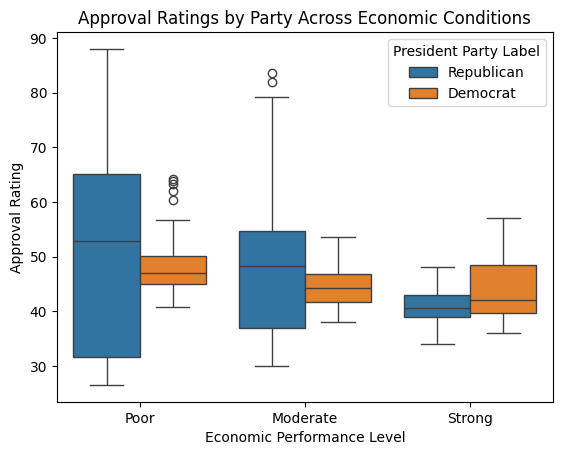

In [ ]:
#buiding EPI (economic performance index)
epi_features = [
    'GDP',
    'Unemployment (%)',
    'Disposable Income',
    'Personal Savings Rate (%of Income)',
    'CCI index',
    'Job Quit Rate'
]

#measure of inflation
df['PCE_to_Income_Ratio'] = df['PCE'] / df['Disposable Income']

#standardizing the features for our index
scaler = StandardScaler()
epi_scaled = scaler.fit_transform(df[epi_features])
epi_scaled_df = pd.DataFrame(epi_scaled, columns=epi_features)

#standardize our inflation measure
df['Inflation_Proxy'] = scaler.fit_transform(df[['PCE_to_Income_Ratio']])

#weighing each measure differently based on how it seems to impact and be directly impacted to the actual economy
weights = {
    'GDP': 0.25,
    'Unemployment (%)': -0.2,
    'Disposable Income': 0.2,
    'Personal Savings Rate (%of Income)': 0.1,
    'CCI index': 0.15,
    'Job Quit Rate': 0.1,
    'Inflation_Proxy': -0.2
}

#weighted EPI total
df['EPI_weighted'] = sum(
    epi_scaled_df[col] * weight if col in epi_scaled_df else df[col] * weight
    for col, weight in weights.items()
)

#set up economy health lvels based on cutoffs
df['EPI_Level'] = pd.qcut(df['EPI_weighted'], q=3, labels=['Poor', 'Moderate', 'Strong'])

#plot
sns.boxplot(data=df, x='EPI_Level', y='Approval Rating', hue='President Party Label')
plt.title("Approval Ratings by Party Across Economic Conditions")
plt.xlabel("Economic Performance Level")
plt.ylabel("Approval Rating")
plt.show()

In [ ]:
data = df

treatment = 'President Party'
#1 for Democrat, 0 for Rep
outcome = 'Approval Rating'
economic_covariates = ['PCE', 'Disposable Income', 'Unemployment (%)',
                      'GDP', 'CCI index', 'Job Quit Rate', 'Personal Savings Rate (%of Income)']

#Standardize economic covariates
scaler = StandardScaler()
data[economic_covariates] = scaler.fit_transform(data[economic_covariates])

# Partisan Bias Evaluation

<ipython-input-46-20b41793bbf3>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ate = wls_model.params[1]



Average Treatment Effect (ATE): 8.73
95% CI: [6.86, 10.60]
n/ Counterfactual Analysis

Effect if Democrats were Republican: -6.57 points
Effect if Republicans were Democratic: 6.20 points


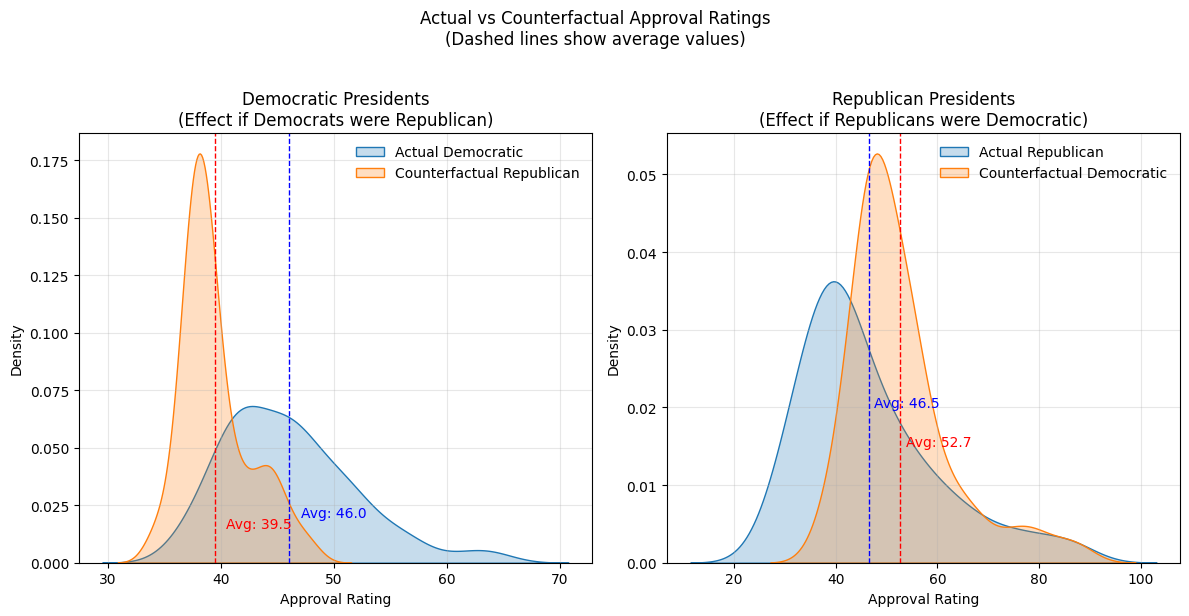

In [ ]:
#propensity score model
ps_model = LogisticRegression()
ps_model.fit(data[economic_covariates], data[treatment])
data['propensity_score'] = ps_model.predict_proba(data[economic_covariates])[:,1]

#Average Treatment Effect (ATE) estimation
#Inverse Probability Weighting
treated = data[treatment] == 1
weights = np.where(treated,
                  1/data['propensity_score'],
                  1/(1-data['propensity_score']))

#regressions weighted
X = sm.add_constant(data[treatment])
wls_model = sm.WLS(data[outcome], X, weights=weights).fit()
ate = wls_model.params[1]
ate_ci = wls_model.conf_int().loc[treatment].values

print(f"\nAverage Treatment Effect (ATE): {ate:.2f}")
print(f"95% CI: [{ate_ci[0]:.2f}, {ate_ci[1]:.2f}]")

#counterfactual anaysis
print("n/ Counterfactual Analysis")

#split by party
dem_data = data[data[treatment] == 1].copy()
rep_data = data[data[treatment] == 0].copy()

#prediction model training
X_cols = economic_covariates + [treatment]
model_gbm = GradientBoostingRegressor(random_state=42)
model_gbm.fit(data[X_cols], data[outcome])

#counterfactual function
def get_counterfactuals(df, new_treatment):
    cf = df.copy()
    cf[treatment] = new_treatment
    return model_gbm.predict(cf[X_cols])

dem_data['counterfactual'] = get_counterfactuals(dem_data, 0)
rep_data['counterfactual'] = get_counterfactuals(rep_data, 1)

#effect on each party
dem_effect = (dem_data['counterfactual'] - dem_data[outcome]).mean()
rep_effect = (rep_data['counterfactual'] - rep_data[outcome]).mean()

print(f"\nEffect if Democrats were Republican: {dem_effect:.2f} points")
print(f"Effect if Republicans were Democratic: {rep_effect:.2f} points")

#visualize results
plt.figure(figsize=(12, 6))

#averages
dem_actual_avg = dem_data[outcome].mean()
dem_cf_avg = dem_data['counterfactual'].mean()
rep_actual_avg = rep_data[outcome].mean()
rep_cf_avg = rep_data['counterfactual'].mean()

#Democratic Presidents plot
plt.subplot(1, 2, 1)
sns.kdeplot(dem_data[outcome], label='Actual Democratic', fill=True)
sns.kdeplot(dem_data['counterfactual'], label='Counterfactual Republican', fill=True)
plt.axvline(dem_actual_avg, color='blue', linestyle='--', linewidth=1)
plt.axvline(dem_cf_avg, color='red', linestyle='--', linewidth=1)

#annotate avgs
plt.text(dem_actual_avg+1, 0.02, f'Avg: {dem_actual_avg:.1f}', color='blue')
plt.text(dem_cf_avg+1, 0.015, f'Avg: {dem_cf_avg:.1f}', color='red')

plt.title("Democratic Presidents\n(Effect if Democrats were Republican)")
plt.xlabel("Approval Rating")
plt.legend(loc='upper right', frameon=False)
plt.grid(True, alpha=0.3)

#Republican Presidents plot
plt.subplot(1, 2, 2)
sns.kdeplot(rep_data[outcome], label='Actual Republican', fill=True)
sns.kdeplot(rep_data['counterfactual'], label='Counterfactual Democratic', fill=True)
plt.axvline(rep_actual_avg, color='blue', linestyle='--', linewidth=1)
plt.axvline(rep_cf_avg, color='red', linestyle='--', linewidth=1)

#annotate avgs
plt.text(rep_actual_avg+1, 0.02, f'Avg: {rep_actual_avg:.1f}', color='blue')
plt.text(rep_cf_avg+1, 0.015, f'Avg: {rep_cf_avg:.1f}', color='red')

plt.title("Republican Presidents\n(Effect if Republicans were Democratic)")
plt.xlabel("Approval Rating")
plt.legend(loc='upper right', frameon=False)
plt.grid(True, alpha=0.3)

plt.suptitle(f"Actual vs Counterfactual Approval Ratings\n(Dashed lines show average values)", y=1.02)
plt.tight_layout()
plt.show()


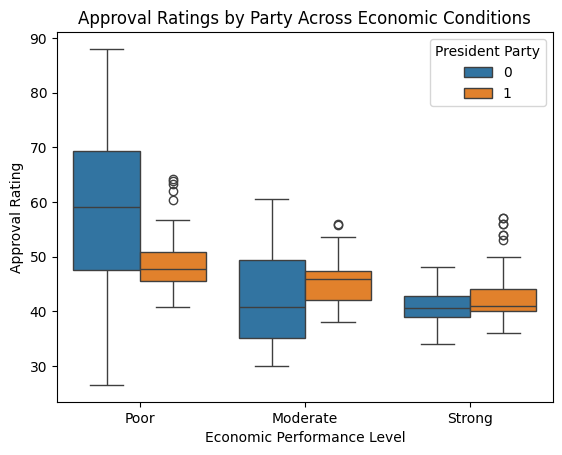

In [ ]:
epi_features = [
    'GDP',
    'Unemployment (%)',
    'Disposable Income',
    'Personal Savings Rate (%of Income)',
    'CCI index',
    'Job Quit Rate'
]

#measure of inflation
df['PCE_to_Income_Ratio'] = df['PCE'] / df['Disposable Income']

#standardizing the features for our index
scaler = StandardScaler()
epi_scaled = scaler.fit_transform(df[epi_features])
epi_scaled_df = pd.DataFrame(epi_scaled, columns=epi_features)

#standardize our inflation measure
df['Inflation_Proxy'] = scaler.fit_transform(df[['PCE_to_Income_Ratio']])

#weighing each measure differently based on how it seems to impact and be directly impacted to the actual economy
weights = {
    'GDP': 0.25,
    'Unemployment (%)': -0.2,
    'Disposable Income': 0.2,
    'Personal Savings Rate (%of Income)': 0.1,
    'CCI index': 0.15,
    'Job Quit Rate': 0.1,
    'Inflation_Proxy': -0.2
}

#weighted EPI total
df['EPI_weighted'] = sum(
    epi_scaled_df[col] * weight if col in epi_scaled_df else df[col] * weight
    for col, weight in weights.items()
)

#set up economy health lvels based on cutoffs
df['EPI_Level'] = pd.qcut(df['EPI_weighted'], q=3, labels=['Poor', 'Moderate', 'Strong'])

#plot
sns.boxplot(data=df, x='EPI_Level', y='Approval Rating', hue='President Party')
plt.title("Approval Ratings by Party Across Economic Conditions")
plt.xlabel("Economic Performance Level")
plt.ylabel("Approval Rating")
plt.show()

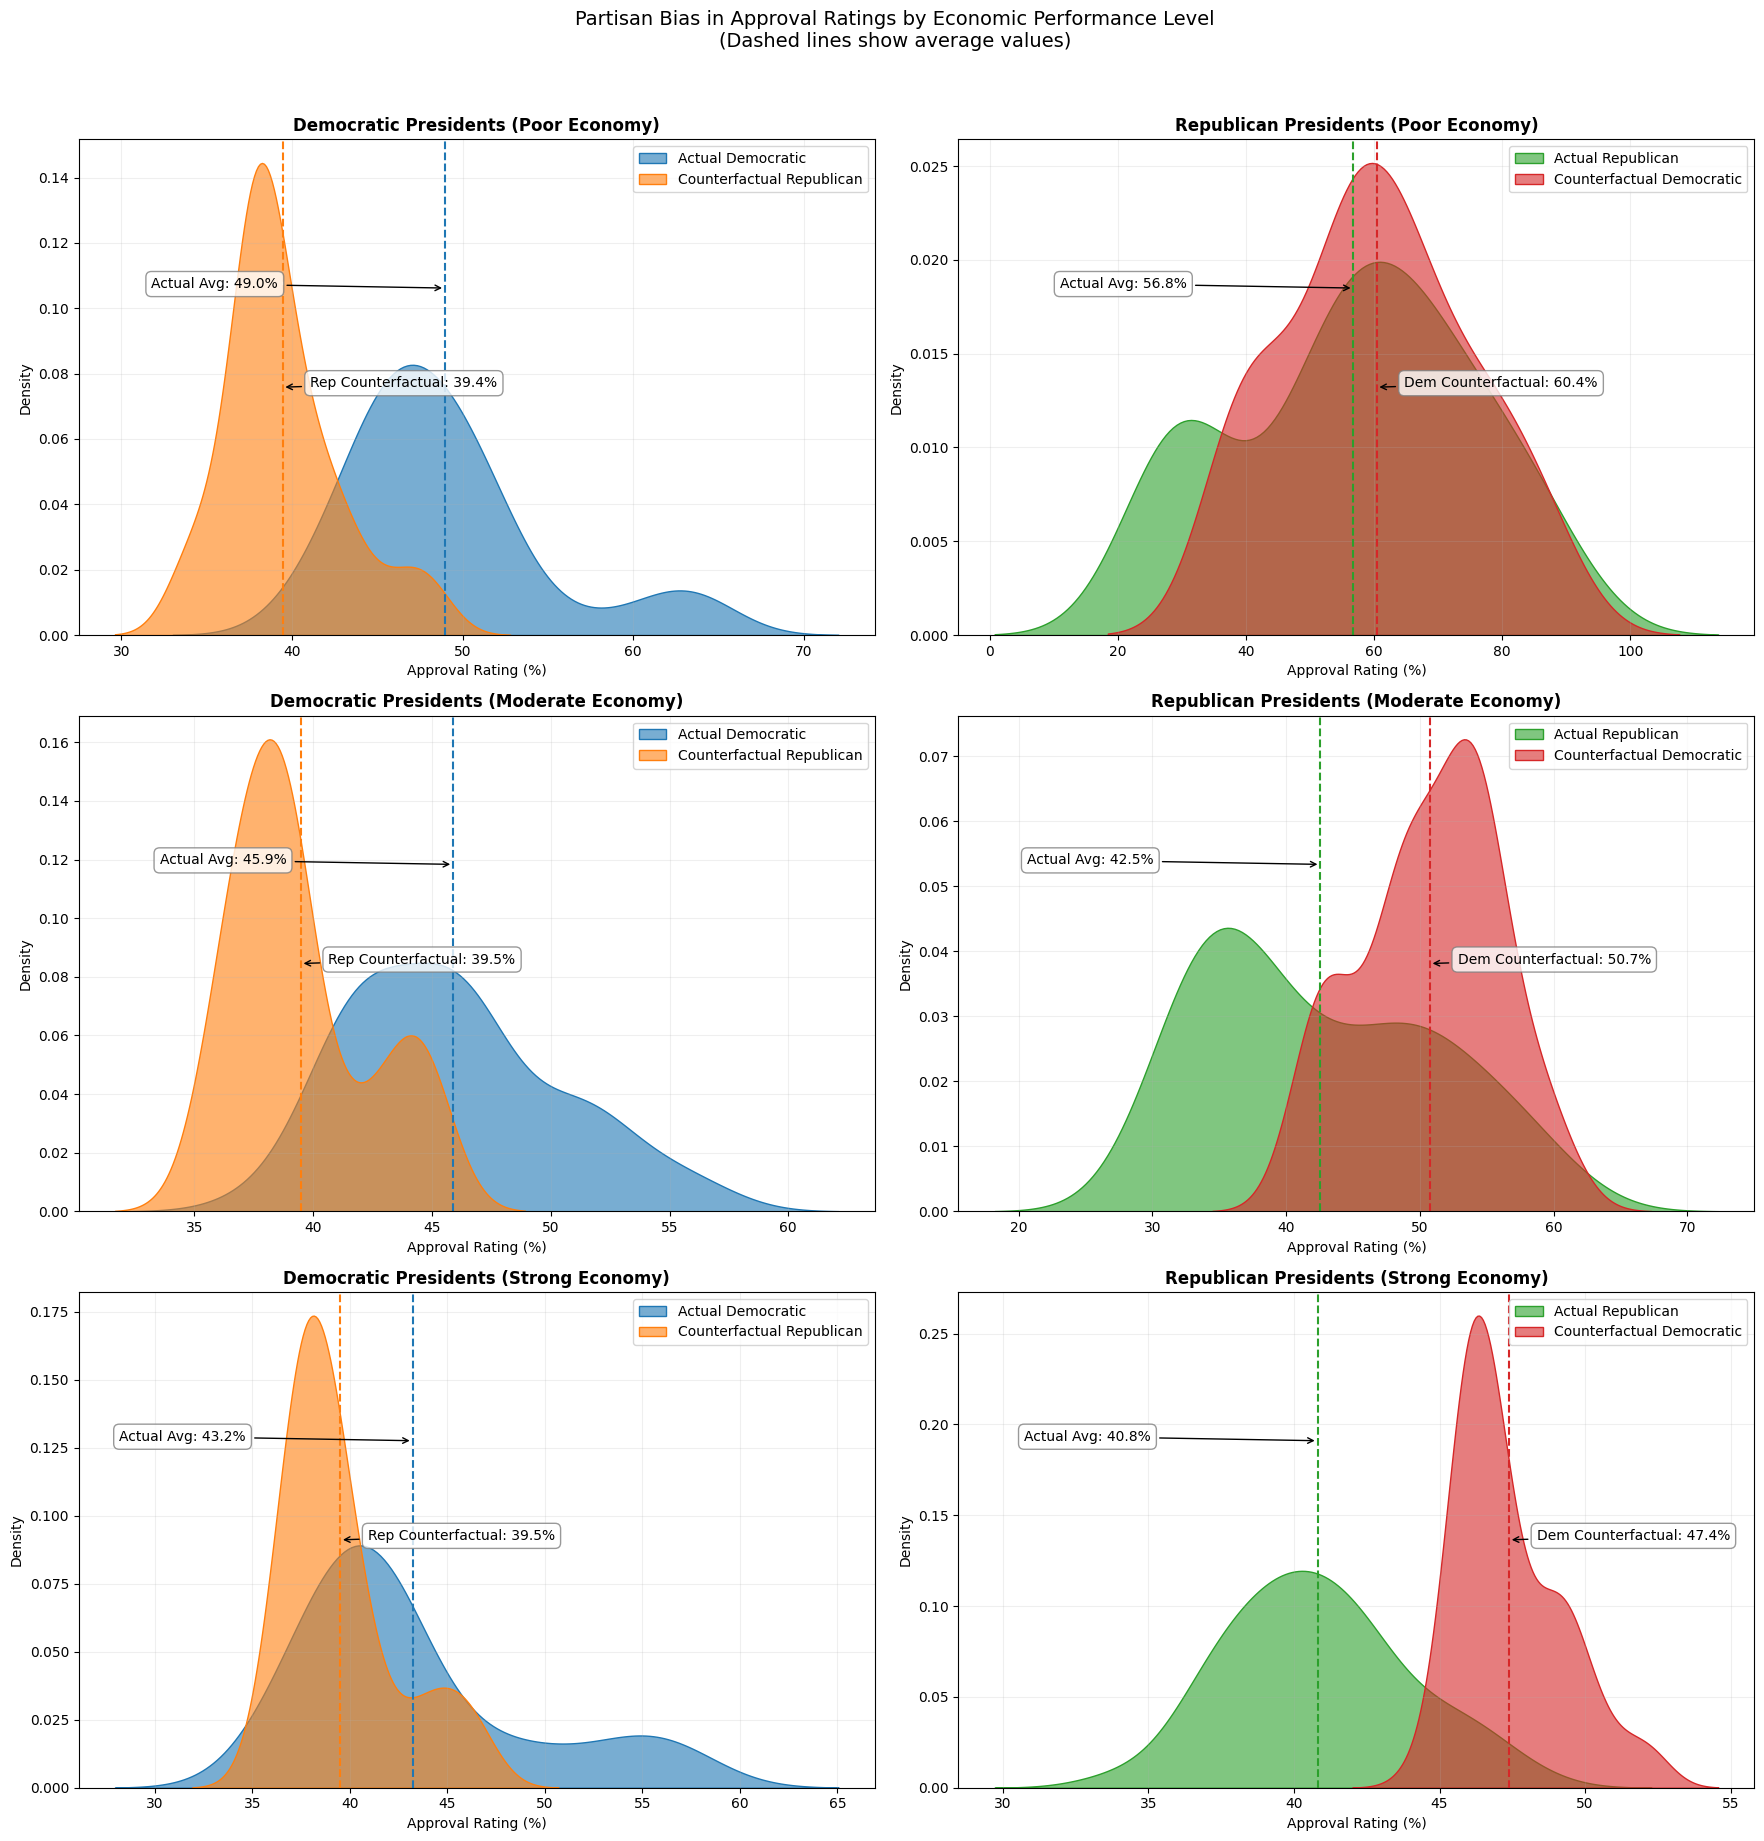

In [ ]:
#set up based on EPI
economic_levels = ['Poor', 'Moderate', 'Strong']
palette = {'Actual Democratic': 'blue', 'Counterfactual Republican': 'red',
           'Actual Republican': 'green', 'Counterfactual Democratic': 'orange'}

data = df

#set up for annotations on the visualizations
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
plt.suptitle("Partisan Bias in Approval Ratings by Economic Performance Level\n(Dashed lines show average values)", y=1.02, fontsize=14)

#gpt for assistance on style of plot visualization
style = {
    'Actual Democratic': {'color': '#1f77b4', 'ls': '--', 'lw': 1.5},
    'Counterfactual Republican': {'color': '#ff7f0e', 'ls': '--', 'lw': 1.5},
    'Actual Republican': {'color': '#2ca02c', 'ls': '--', 'lw': 1.5},
    'Counterfactual Democratic': {'color': '#d62728', 'ls': '--', 'lw': 1.5},
    'annotation': {
        'fontsize': 10,
        'bbox': dict(boxstyle='round,pad=0.4', fc='white', ec='gray', alpha=0.8),
        'arrowprops': dict(arrowstyle="->", connectionstyle="arc3")
    }
}

#iterate through different economic levels (3)
for i, level in enumerate(economic_levels):
    level_data = data[data['EPI_Level'] == level]

    #prepare data based on party
    dem_data = level_data[level_data[treatment] == 1].copy()
    rep_data = level_data[level_data[treatment] == 0].copy()

    #boosting model
    model = GradientBoostingRegressor(random_state=42)
    model.fit(level_data[X_cols], level_data[outcome])

    dem_data['counterfactual'] = get_counterfactuals(dem_data, 0)
    rep_data['counterfactual'] = get_counterfactuals(rep_data, 1)

    dem_avg = dem_data[outcome].mean()
    dem_cf_avg = dem_data['counterfactual'].mean()
    rep_avg = rep_data[outcome].mean()
    rep_cf_avg = rep_data['counterfactual'].mean()

    #democrat plot
    ax = axes[i, 0]
    sns.kdeplot(dem_data[outcome], ax=ax, label='Actual Democratic',
               color=style['Actual Democratic']['color'], fill=True, alpha=0.6)
    sns.kdeplot(dem_data['counterfactual'], ax=ax, label='Counterfactual Republican',
               color=style['Counterfactual Republican']['color'], fill=True, alpha=0.6)
    ax.axvline(dem_avg, **style['Actual Democratic'])
    ax.axvline(dem_cf_avg, **style['Counterfactual Republican'])

    #actual democrat
    ax.annotate(f'Actual Avg: {dem_avg:.1f}%',
                xy=(dem_avg, ax.get_ylim()[1]*0.7),
                xytext=(-120, 0), textcoords='offset points',
                ha='right', **style['annotation'])

    #countefactual democrat
    ax.annotate(f'Rep Counterfactual: {dem_cf_avg:.1f}%',
                xy=(dem_cf_avg, ax.get_ylim()[1]*0.5),
                xytext=(20, 0), textcoords='offset points',
                ha='left', **style['annotation'])

    ax.set_title(f"Democratic Presidents ({level} Economy)", fontweight='bold')
    ax.set_xlabel("Approval Rating (%)", fontsize=10)
    ax.set_ylabel("Density", fontsize=10)
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.2)

    #republican plot
    ax = axes[i, 1]
    sns.kdeplot(rep_data[outcome], ax=ax, label='Actual Republican',
               color=style['Actual Republican']['color'], fill=True, alpha=0.6)
    sns.kdeplot(rep_data['counterfactual'], ax=ax, label='Counterfactual Democratic',
               color=style['Counterfactual Democratic']['color'], fill=True, alpha=0.6)
    ax.axvline(rep_avg, **style['Actual Republican'])
    ax.axvline(rep_cf_avg, **style['Counterfactual Democratic'])

    #republican actual
    ax.annotate(f'Actual Avg: {rep_avg:.1f}%',
                xy=(rep_avg, ax.get_ylim()[1]*0.7),
                xytext=(-120, 0), textcoords='offset points',
                ha='right', **style['annotation'])

    #republican counterfactual
    ax.annotate(f'Dem Counterfactual: {rep_cf_avg:.1f}%',
                xy=(rep_cf_avg, ax.get_ylim()[1]*0.5),
                xytext=(20, 0), textcoords='offset points',
                ha='left', **style['annotation'])

    ax.set_title(f"Republican Presidents ({level} Economy)", fontweight='bold')
    ax.set_xlabel("Approval Rating (%)", fontsize=10)
    ax.set_ylabel("Density", fontsize=10)
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

In [ ]:
#showing effects based on plots above, using table for visualization and cleaner presentations
effects = []

#reuse syntax for iteration
for level in economic_levels:
    level_data = data[data['EPI_Level'] == level]
    dem_data = level_data[level_data[treatment] == 1].copy()
    rep_data = level_data[level_data[treatment] == 0].copy()

    #reuse same model
    model = GradientBoostingRegressor(random_state=42)
    model.fit(level_data[X_cols], level_data[outcome])

    dem_data['counterfactual'] = get_counterfactuals(dem_data, 0)
    rep_data['counterfactual'] = get_counterfactuals(rep_data, 1)

    effects.append({
        'Economic Level': level,
        'Dem→Rep Effect': f"{(dem_data['counterfactual'] - dem_data[outcome]).mean():.2f} pts",
        'Rep→Dem Effect': f"{(rep_data['counterfactual'] - rep_data[outcome]).mean():.2f} pts",
        'Dem Avg Approval': f"{dem_data[outcome].mean():.1f}%",
        'Rep Avg Approval': f"{rep_data[outcome].mean():.1f}%"
    })

#show effets
print("\nEffect Sizes by Economic Performance Level:")
display(pd.DataFrame(effects))


Effect Sizes by Economic Performance Level:


,Economic Level,Dem→Rep Effect,Rep→Dem Effect,Dem Avg Approval,Rep Avg Approval
0,Poor,-11.09 pts,3.36 pts,49.0%,56.8%
1,Moderate,-0.06 pts,0.23 pts,45.9%,42.5%
2,Strong,-2.83 pts,2.06 pts,43.2%,40.8%


# Institutional Bias Evaluation

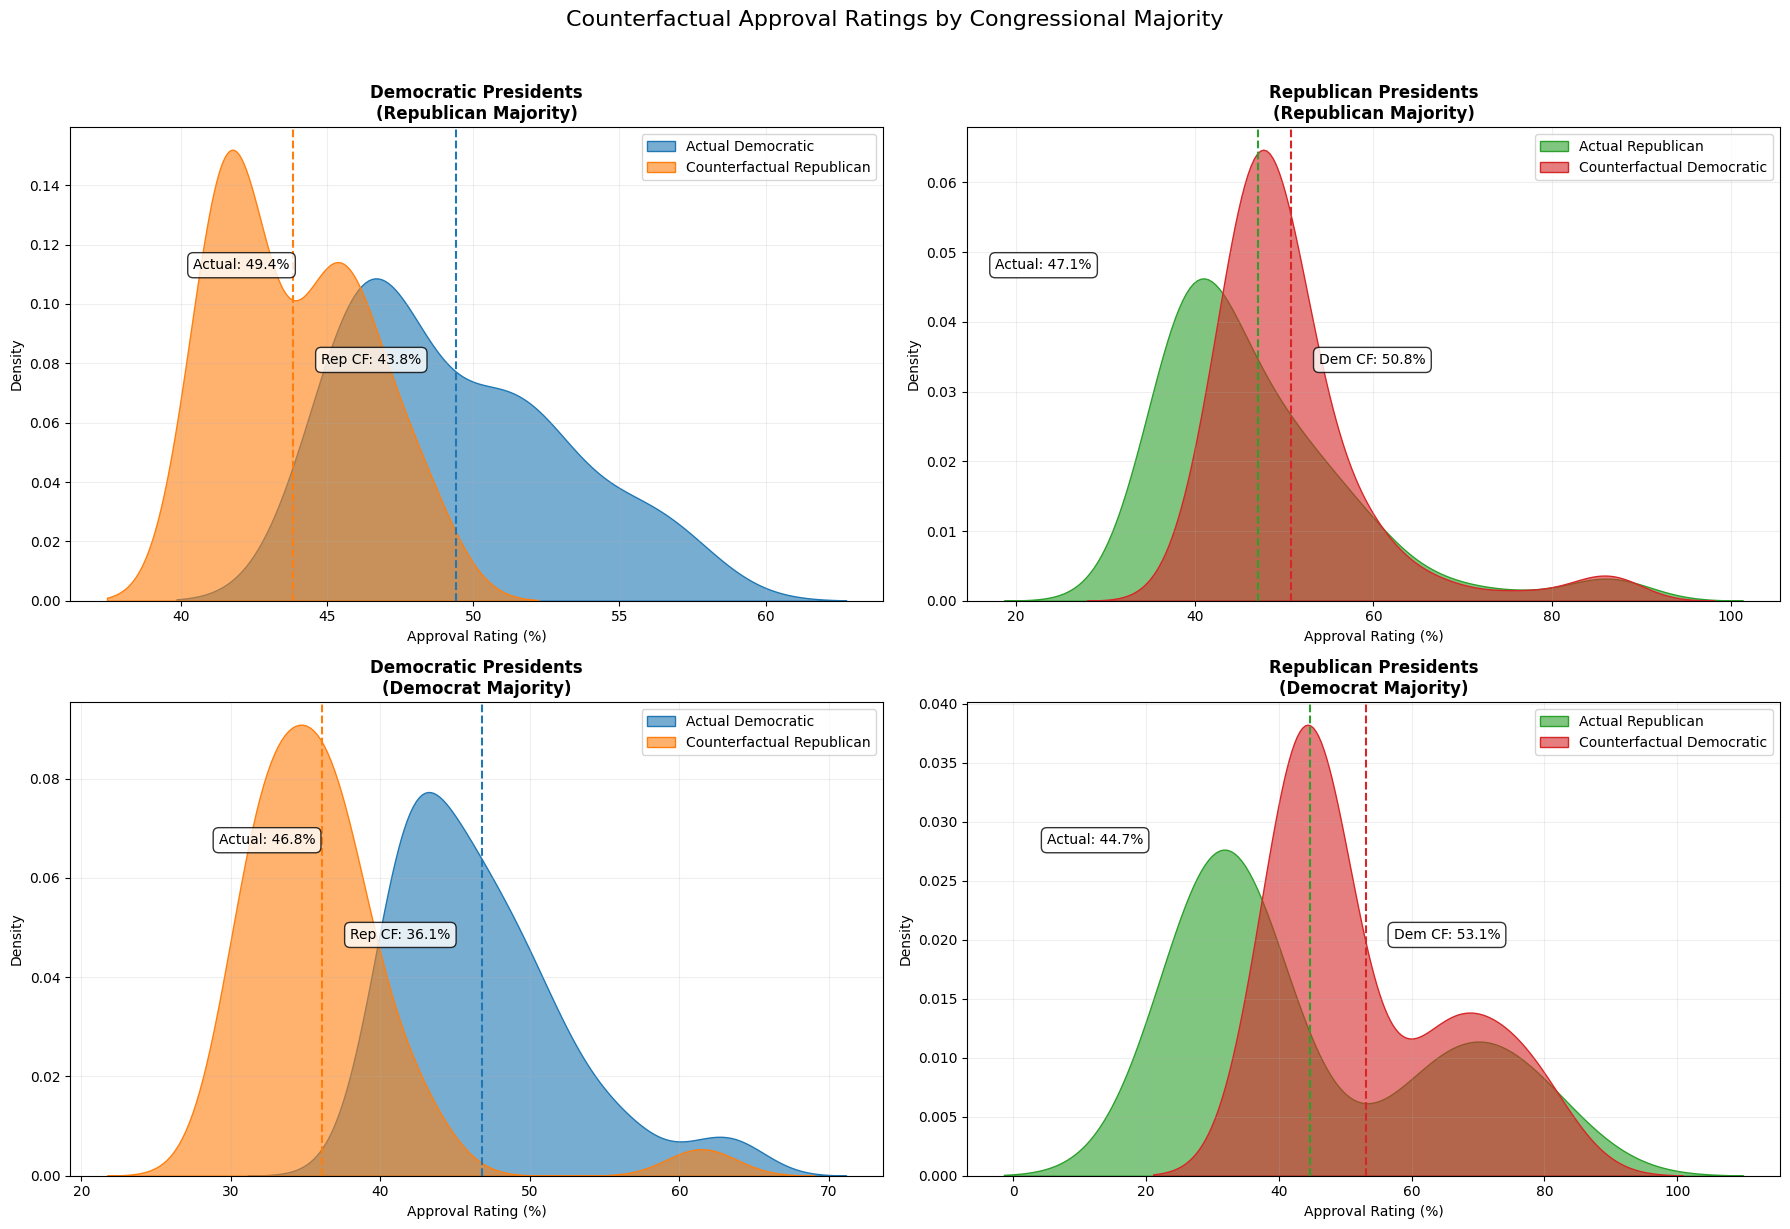


Counterfactual Effects by Congressional Majority:


,Congress Majority,Dem→Rep Effect,Rep→Dem Effect,Dem Avg Approval,Rep Avg Approval,Opposition Penalty
0,Republican Majority,-5.58 pts,3.67 pts,49.4%,47.1%,-2.3 pts
1,Democrat Majority,-10.68 pts,8.42 pts,46.8%,44.7%,-2.1 pts


In [ ]:
data = df.copy()

#repeat experiemnt above based on congressional majority

#define variables
treatment = 'President Party'  # 1 for Democrat, 0 for Republican
outcome = 'Approval Rating'
economic_covariates = ['PCE', 'Disposable Income', 'Unemployment (%)',
                      'GDP', 'CCI index', 'Job Quit Rate', 'Personal Savings Rate (%of Income)']

#scale data
scaler = StandardScaler()
data[economic_covariates] = scaler.fit_transform(data[economic_covariates])

#congressional majority
data = data[data['Congress Majority'].isin([0, 1])]

#defining majority
congress_labels = {0: 'Republican Majority', 1: 'Democrat Majority'}

#plot and visual set up
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
plt.suptitle("Counterfactual Approval Ratings by Congressional Majority", y=1.02, fontsize=16)
palette = {
    'Actual Democratic': '#1f77b4',
    'Counterfactual Republican': '#ff7f0e',
    'Actual Republican': '#2ca02c',
    'Counterfactual Democratic': '#d62728'
}

#store results
results = []

#iterate through types of majority
for i, congress_majority in enumerate([0, 1]):
    congress_data = data[data['Congress Majority'] == congress_majority]

    #skip if no data for this Congress type
    if len(congress_data) == 0:
        print(f"No data for Congress Majority = {congress_majority}")
        continue

    #split via presidential party
    dem_data = congress_data[congress_data[treatment] == 1].copy()
    rep_data = congress_data[congress_data[treatment] == 0].copy()

    #skip if no data on party
    if len(dem_data) == 0 or len(rep_data) == 0:
        print(f"Insufficient data for {congress_labels[congress_majority]}")
        continue

    #boosting model
    model = GradientBoostingRegressor(random_state=42)
    X_cols = economic_covariates + [treatment]
    model.fit(congress_data[X_cols], congress_data[outcome])

    #reuse of counterfactual function
    def get_counterfactuals(df, new_treatment):
        cf = df.copy()
        cf[treatment] = new_treatment
        return model.predict(cf[X_cols])

    dem_data['counterfactual'] = get_counterfactuals(dem_data, 0)
    rep_data['counterfactual'] = get_counterfactuals(rep_data, 1)

    #syntax repeated
    dem_effect = (dem_data['counterfactual'] - dem_data[outcome]).mean()
    rep_effect = (rep_data['counterfactual'] - rep_data[outcome]).mean()

    #Democratic president plot, copied syntax
    ax = axes[i, 0]
    sns.kdeplot(dem_data[outcome], ax=ax, label='Actual Democratic',
               color=palette['Actual Democratic'], fill=True, alpha=0.6)
    sns.kdeplot(dem_data['counterfactual'], ax=ax, label='Counterfactual Republican',
               color=palette['Counterfactual Republican'], fill=True, alpha=0.6)
    dem_avg = dem_data[outcome].mean()
    dem_cf_avg = dem_data['counterfactual'].mean()
    ax.axvline(dem_avg, color=palette['Actual Democratic'], linestyle='--', linewidth=1.5)
    ax.axvline(dem_cf_avg, color=palette['Counterfactual Republican'], linestyle='--', linewidth=1.5)

    #annotations for visual
    ax.annotate(f'Actual: {dem_avg:.1f}%', xy=(dem_avg, ax.get_ylim()[1]*0.7),
                xytext=(-120, 0), textcoords='offset points', ha='right',
                bbox=dict(boxstyle='round,pad=0.4', fc='white', alpha=0.8))
    ax.annotate(f'Rep CF: {dem_cf_avg:.1f}%', xy=(dem_cf_avg, ax.get_ylim()[1]*0.5),
                xytext=(20, 0), textcoords='offset points', ha='left',
                bbox=dict(boxstyle='round,pad=0.4', fc='white', alpha=0.8))

    ax.set_title(f"Democratic Presidents\n({congress_labels[congress_majority]})", fontweight='bold')
    ax.set_xlabel("Approval Rating (%)")
    ax.set_ylabel("Density")
    ax.legend()
    ax.grid(True, alpha=0.2)

    #Republican president plot, copied syntax
    ax = axes[i, 1]
    sns.kdeplot(rep_data[outcome], ax=ax, label='Actual Republican',
               color=palette['Actual Republican'], fill=True, alpha=0.6)
    sns.kdeplot(rep_data['counterfactual'], ax=ax, label='Counterfactual Democratic',
               color=palette['Counterfactual Democratic'], fill=True, alpha=0.6)
    rep_avg = rep_data[outcome].mean()
    rep_cf_avg = rep_data['counterfactual'].mean()
    ax.axvline(rep_avg, color=palette['Actual Republican'], linestyle='--', linewidth=1.5)
    ax.axvline(rep_cf_avg, color=palette['Counterfactual Democratic'], linestyle='--', linewidth=1.5)

    #annotations for visuals
    ax.annotate(f'Actual: {rep_avg:.1f}%', xy=(rep_avg, ax.get_ylim()[1]*0.7),
                xytext=(-120, 0), textcoords='offset points', ha='right',
                bbox=dict(boxstyle='round,pad=0.4', fc='white', alpha=0.8))
    ax.annotate(f'Dem CF: {rep_cf_avg:.1f}%', xy=(rep_cf_avg, ax.get_ylim()[1]*0.5),
                xytext=(20, 0), textcoords='offset points', ha='left',
                bbox=dict(boxstyle='round,pad=0.4', fc='white', alpha=0.8))

    ax.set_title(f"Republican Presidents\n({congress_labels[congress_majority]})", fontweight='bold')
    ax.set_xlabel("Approval Rating (%)")
    ax.set_ylabel("Density")
    ax.legend()
    ax.grid(True, alpha=0.2)

    #store back in results for table
    results.append({
        'Congress Majority': congress_labels[congress_majority],
        'Dem→Rep Effect': f"{dem_effect:.2f} pts",
        'Rep→Dem Effect': f"{rep_effect:.2f} pts",
        'Dem Avg Approval': f"{dem_avg:.1f}%",
        'Rep Avg Approval': f"{rep_avg:.1f}%",
        'Opposition Penalty': f"{(rep_avg - dem_avg):.1f} pts"
    })

plt.tight_layout()
plt.show()

#display table of results
print("\nCounterfactual Effects by Congressional Majority:")
display(pd.DataFrame(results))

# Algorithmic Bias


## Model Selection

In [ ]:
#causal inference estimate sensitivity
print("\n Sensitivity Analysis")

#propensity results for comparison
ps_models = {
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVM': SVC(probability=True, kernel='linear')
}

#store results
sensitivity_results = []

#iterate through each type of model
for model_name, model in ps_models.items():
    try:
        #fit to propensity model
        if hasattr(model, 'predict_proba'):
            model.fit(data[economic_covariates], data[treatment])
            ps = model.predict_proba(data[economic_covariates])[:,1]
        #raw estimation if no predict_proba
        else:
            model.fit(data[economic_covariates], data[treatment])
            ps = model.predict(data[economic_covariates])

        #calculation of weights
        weights = np.where(data[treatment] == 1, 1/ps, 1/(1-ps))

        #ATE estimations
        X = sm.add_constant(data[treatment])
        wls_model = sm.WLS(data[outcome], X, weights=weights).fit()

        sensitivity_results.append({
            'Model': model_name,
            'ATE': wls_model.params[1],
            'CI_lower': wls_model.conf_int().loc[treatment][0],
            'CI_upper': wls_model.conf_int().loc[treatment][1]
        })
    #if model errors
    except Exception as e:
        print(f"Error with {model_name}: {str(e)}")


 Sensitivity Analysis


<ipython-input-82-89a72575922f>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'ATE': wls_model.params[1],
<ipython-input-82-89a72575922f>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'ATE': wls_model.params[1],
<ipython-input-82-89a72575922f>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'ATE': wls_model.params[1],


In [ ]:
#different outcomes/models
outcome_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

#iterate through our model types
for model_name, model in outcome_models.items():
    try:
        #train models on data
        model.fit(data[X_cols], data[outcome])

        #counterfactuals calc
        data_counterfactual = data.copy()
        data_counterfactual[treatment] = 1 - data_counterfactual[treatment]  # Flip treatment

        #ATE calc
        pred_factual = model.predict(data[X_cols])
        pred_counterfactual = model.predict(data_counterfactual[X_cols])
        ate = np.mean(pred_counterfactual - pred_factual)

        #boostrp of CI
        bootstrap_ates = []
        for _ in range(100):
            sample_idx = np.random.choice(len(data), len(data), replace=True)
            bootstrap_ate = np.mean(pred_counterfactual[sample_idx] - pred_factual[sample_idx])
            bootstrap_ates.append(bootstrap_ate)

        ci_lower = np.percentile(bootstrap_ates, 2.5)
        ci_upper = np.percentile(bootstrap_ates, 97.5)

        #append sensitivity for display later
        sensitivity_results.append({
            'Model': f"Outcome: {model_name}",
            'ATE': ate,
            'CI_lower': ci_lower,
            'CI_upper': ci_upper
        })
    except Exception as e:
        print(f"Error with {model_name}: {str(e)}")

In [ ]:
#covariate sets with impacts on ATE
covariate_sets = {
    'Basic': ['Unemployment (%)', 'GDP', 'CCI index'],
    'Extended': economic_covariates,
    #interaction terms of squared variables
    'With Interactions': economic_covariates + [f"{x}_sq" for x in economic_covariates]
}

#inclusion of squared terms
for var in economic_covariates:
    data[f"{var}_sq"] = data[var]**2

for set_name, covariates in covariate_sets.items():
    try:
        #fit set to the propensity models
        ps_model = LogisticRegression().fit(data[covariates], data[treatment])
        ps = ps_model.predict_proba(data[covariates])[:,1]

        #weight calc
        weights = np.where(data[treatment] == 1, 1/ps, 1/(1-ps))

        #ATE model
        X = sm.add_constant(data[treatment])
        wls_model = sm.WLS(data[outcome], X, weights=weights).fit()

        #results for print
        sensitivity_results.append({
            'Model': f"Covariates: {set_name}",
            'ATE': wls_model.params[1],
            'CI_lower': wls_model.conf_int().loc[treatment][0],
            'CI_upper': wls_model.conf_int().loc[treatment][1]
        })
    except Exception as e:
        print(f"Error with {set_name}: {str(e)}")

#to df
sensitivity_df = pd.DataFrame(sensitivity_results)

#results
print("\nSensitivity Analysis Results:")
display(sensitivity_df.round(3))

<ipython-input-84-5294ec1544ac>:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'ATE': wls_model.params[1],
<ipython-input-84-5294ec1544ac>:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'ATE': wls_model.params[1],



Sensitivity Analysis Results:


<ipython-input-84-5294ec1544ac>:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'ATE': wls_model.params[1],


,Model,ATE,CI_lower,CI_upper
0,Logistic Regression,8.729,6.862,10.595
1,Gradient Boosting,-0.448,-2.893,1.996
2,SVM,8.773,6.923,10.623
3,Outcome: Linear Regression,0.028,-0.807,1.029
4,Outcome: Random Forest,-0.575,-1.095,0.030
5,Outcome: Gradient Boosting,-0.166,-0.943,0.564
6,Covariates: Basic,1.904,-0.061,3.868
7,Covariates: Extended,8.729,6.862,10.595
8,Covariates: With Interactions,1.564,-0.769,3.897


<ipython-input-85-5dafbf7055a9>:5: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x='ATE', y='Model', data=sensitivity_df,


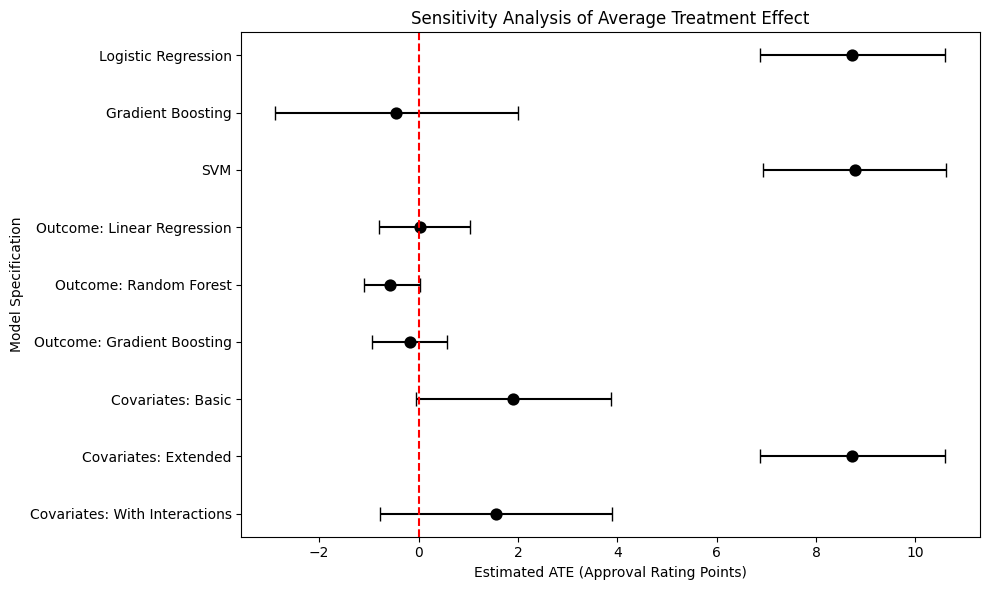

In [ ]:
#visual of above
plt.figure(figsize=(10, 6))

#point plot without errors
ax = sns.pointplot(x='ATE', y='Model', data=sensitivity_df,
                  join=False, color='black')

#error inclusion
for i, (_, row) in enumerate(sensitivity_df.iterrows()):
    lower = row['ATE'] - row['CI_lower']
    upper = row['CI_upper'] - row['ATE']
    plt.errorbar(x=row['ATE'], y=i,
                xerr=[[lower], [upper]],
                color='black', capsize=5)

plt.axvline(x=0, color='red', linestyle='--')
plt.title("Sensitivity Analysis of Average Treatment Effect")
plt.xlabel("Estimated ATE (Approval Rating Points)")
plt.ylabel("Model Specification")
plt.tight_layout()
plt.show()


Model Performance Comparison:
               Model       MAE        MSE        R2
0  Linear Regression  4.952732  78.964720  0.083185
1      Random Forest  2.435650  11.646754  0.864776
2  Gradient Boosting  2.370663  11.670676  0.864498
3                SVM  4.161088  44.958371  0.478013


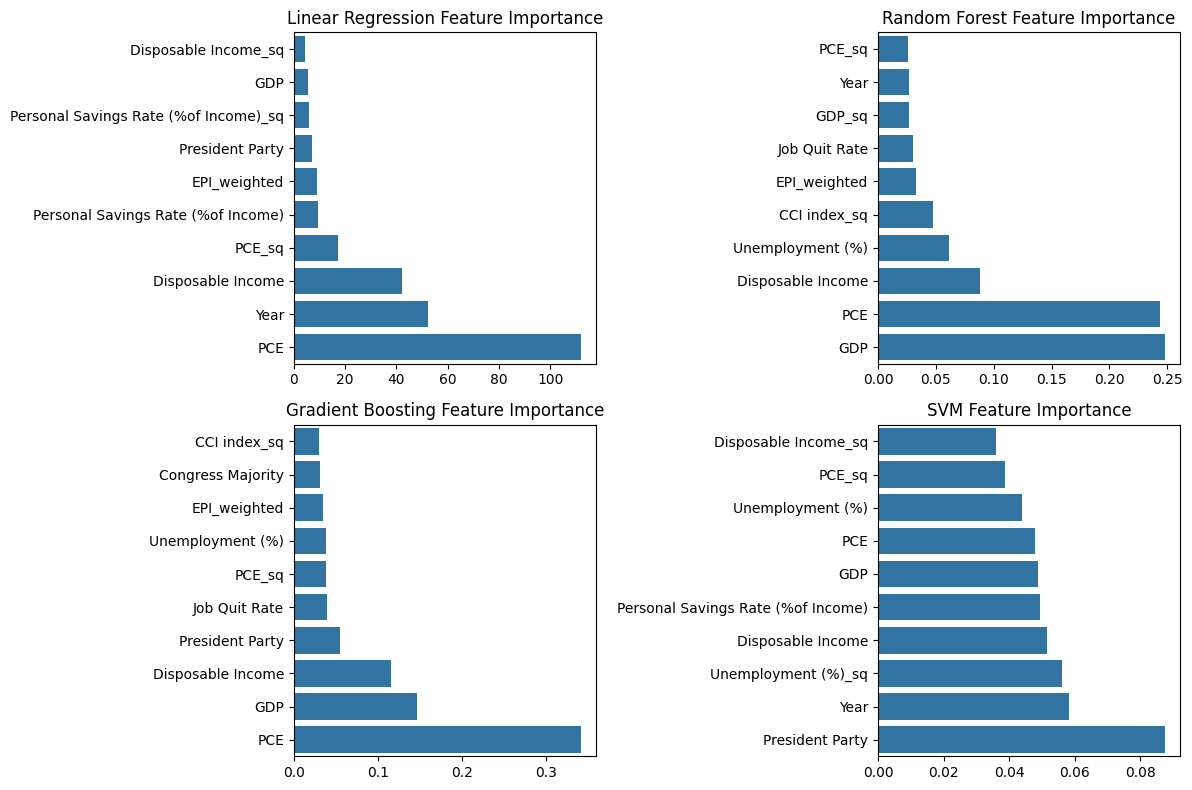

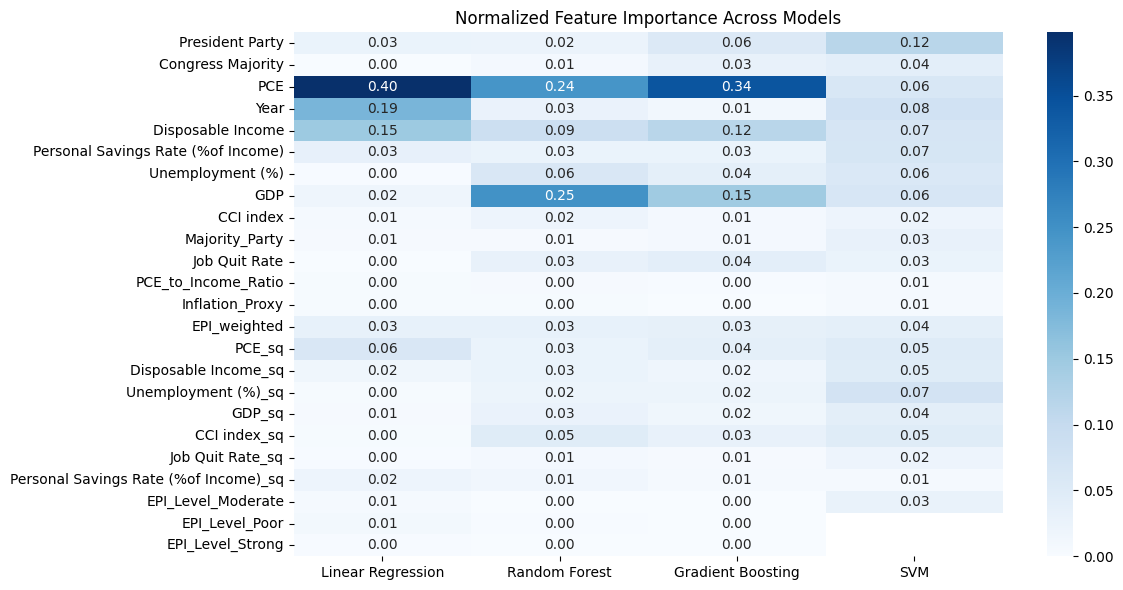


Potential Bias Analysis:
Features that are consistently highly weighted across models may indicate strong predictors
Large discrepancies in feature importance between models may indicate algorithmic bias

Features with highest variation in importance across models (potential bias indicators):
PCE                  0.146897
GDP                  0.100765
Year                 0.078438
President Party      0.042794
Disposable Income    0.035395
dtype: float64


In [ ]:
#model comparison

#x and y, vars and target
X = df.drop(columns=['Approval Rating'])
y = df['Approval Rating']

#numeric and categorical split
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

#pre-processing pipelines for numeric and categoricals
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#combine two pre-processors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

#train and test splits of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize our models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVM": SVR()
}

#dict for storing the results on each model
results = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'R2': [],
    'Feature Importance': []
}

#one hot encoding of feature names
preprocessor.fit(X_train)
feature_names = numeric_cols.tolist()
if len(categorical_cols) > 0:
    cat_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)
    feature_names.extend(cat_features)

#iterate through and run/train each model
for name, model in models.items():
    #pipeline of pre-processor + model now
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    #train model
    pipeline.fit(X_train, y_train)

    #model on test set
    y_pred = pipeline.predict(X_test)

    #model metrics for evaluation
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    #store to results for display and comparison
    results['Model'].append(name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['R2'].append(r2)

    #feature importance based on type of model
    if name == "Linear Regression":
        importances = np.abs(pipeline.named_steps['model'].coef_)
    elif name in ["Random Forest", "Gradient Boosting"]:
        importances = pipeline.named_steps['model'].feature_importances_
    else: #permutation importance on svm
        r = permutation_importance(pipeline, X_test, y_test, n_repeats=10, random_state=42)
        importances = r.importances_mean

    results['Feature Importance'].append(importances)

#results to df
results_df = pd.DataFrame(results)

#display for comparison
print("\nModel Performance Comparison:")
print(results_df[['Model', 'MAE', 'MSE', 'R2']])

#visualization
plt.figure(figsize=(12, 8))
for i, (name, importances) in enumerate(zip(results['Model'], results['Feature Importance'])):
    plt.subplot(2, 2, i+1)
    #top 10 features
    sorted_idx = np.argsort(importances)[-10:]
    sns.barplot(x=importances[sorted_idx], y=np.array(feature_names)[sorted_idx])
    plt.title(f'{name} Feature Importance')
    plt.tight_layout()

plt.show()

#compare models and features across each
normalized_importances = []
for imp in results['Feature Importance']:
    normalized = imp / np.sum(imp)
    normalized_importances.append(normalized)

importance_comparison = pd.DataFrame(normalized_importances,
                                    index=results['Model'],
                                    columns=feature_names)

plt.figure(figsize=(12, 6))
sns.heatmap(importance_comparison.T, annot=True, cmap='Blues', fmt='.2f')
plt.title('Normalized Feature Importance Across Models')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#biases
print("\nPotential Bias Analysis:")
print("Features that are consistently highly weighted across models may indicate strong predictors")
print("Large discrepancies in feature importance between models may indicate algorithmic bias")

#high importance/variance
importance_std = importance_comparison.std(axis=0)
print("\nFeatures with highest variation in importance across models (potential bias indicators):")
print(importance_std.sort_values(ascending=False).head())

## Party Sepcific Model

In [ ]:
#gradient boost model set up
final_model_gradient_boost = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(
        random_state=42,
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3
    ))
])

#data split for model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train model
final_model_gradient_boost.fit(X_train, y_train)

#model eval
y_pred = final_model_gradient_boost.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")

R2 Score: 0.8645
MAE: 2.3707


In [ ]:
economic_vars = [
    'GDP',
    'Unemployment (%)',
    'Disposable Income',
    'PCE',
    'CCI index',
    'Job Quit Rate',
    'Personal Savings Rate (%of Income)'
]

# Standardize the economic variables
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[economic_vars] = scaler.fit_transform(df_standardized[economic_vars])

# Check the updated data
df_standardized[['President Party'] + economic_vars + ['Approval Rating']].head()

,President Party,GDP,Unemployment (%),Disposable Income,PCE,CCI index,Job Quit Rate,Personal Savings Rate (%of Income),Approval Rating
0,0,-1.399142,-0.800057,-1.530474,-1.428189,1.278360,0.774786,-0.345993,58.67
1,0,-1.399142,-0.749201,-1.516323,-1.429656,1.191810,1.293115,-0.254020,58.00
2,0,-1.399142,-0.698345,-1.526046,-1.427498,1.139879,0.515621,-0.284678,60.50
3,0,-1.399142,-0.749201,-1.534446,-1.413516,1.096604,1.033950,-0.437966,55.00
4,0,-1.399142,-0.647488,-1.532894,-1.408653,1.061983,0.515621,-0.468624,54.00


In [ ]:
#disparate impact analysis
interaction_formula = ' + '.join([f'Q("{var}")*Q("President Party")' for var in economic_vars])
full_formula = f'Q("Approval Rating") ~ {interaction_formula}'

#fit with interaction terms
interaction_model = smf.ols(formula=full_formula, data=df_standardized).fit()

#model by party
df_dem = df_standardized[df_standardized['President Party'] == 1]
df_rep = df_standardized[df_standardized['President Party'] == 0]

base_formula = 'Q("Approval Rating") ~ ' + ' + '.join([f'Q("{var}")' for var in economic_vars])

model_dem = smf.ols(formula=base_formula, data=df_dem).fit()
model_rep = smf.ols(formula=base_formula, data=df_rep).fit()

interaction_model_summary = interaction_model.summary()
model_dem_summary = model_dem.summary()
model_rep_summary = model_rep.summary()

interaction_model_summary, model_dem_summary, model_rep_summary

(<class 'statsmodels.iolib.summary.Summary'>
 """
                              OLS Regression Results                             
 Dep. Variable:     Q("Approval Rating")   R-squared:                       0.685
 Model:                              OLS   Adj. R-squared:                  0.668
 Method:                   Least Squares   F-statistic:                     39.38
 Date:                  Mon, 05 May 2025   Prob (F-statistic):           3.43e-59
 Time:                          21:27:10   Log-Likelihood:                -915.49
 No. Observations:                   287   AIC:                             1863.
 Df Residuals:                       271   BIC:                             1922.
 Df Model:                            15                                         
 Covariance Type:              nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]


R² = 0.685 so Strong explanatory power

Party variable is significant: Democratic presidents receive ~3.95 points lower (baseline) unless offset by interaction effects.

Variable	Effect (Interaction Term)	Interpretation

GDP × Party	+45.95 (p = 0.026)	GDP benefits Democrats more

Unemployment × Party	–5.50 (p = 0.024)	Unemployment hurts Democrats more

Disposable Income × Party	+155.86 (p < 0.001)	Huge boost for Democrats

PCE × Party	–192.82 (p < 0.001)	PCE hurts Democrats, not Republicans

CCI × Party	–11.71 (p < 0.001)	Confidence Index boosts Republicans more

Savings × Party	–39.04 (p < 0.001)	Savings boost Republicans; Democrats penalized

Job Quit Rate × Party	–3.12 (p = 0.011)	Again, favors Republicans

In [ ]:
group_summary = df_standardized.groupby(['EPI_Level', 'President Party'])['Approval Rating'].agg(['mean', 'count', 'std']).reset_index()

#rename for clarity
group_summary = group_summary.rename(columns={
    'mean': 'Mean Approval',
    'count': 'Num Observations',
    'std': 'Std Dev'
})

print(group_summary)

  EPI_Level  President Party  Mean Approval  Num Observations    Std Dev
0      Poor                0      56.779348                46  18.433615
1      Poor                1      48.965000                50   5.684182
2  Moderate                0      42.547647                51   8.638719
3  Moderate                1      45.886364                44   4.344220
4    Strong                0      40.809574                47   3.078231
5    Strong                1      43.208163                49   5.845746


<ipython-input-94-ec37de484d6a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_summary = df_standardized.groupby(['EPI_Level', 'President Party'])['Approval Rating'].agg(['mean', 'count', 'std']).reset_index()


In [ ]:
#store epi results
epi_regression_results = {}

#iterate through epi levels
for level in ['Poor', 'Moderate', 'Strong']:
    subset = df_standardized[df_standardized['EPI_Level'] == level]
    model = smf.ols(formula='Q("Approval Rating") ~ Q("President Party")', data=subset).fit()
    epi_regression_results[level] = model.summary()

epi_regression_results['Poor'], epi_regression_results['Moderate'], epi_regression_results['Strong']

(<class 'statsmodels.iolib.summary.Summary'>
 """
                              OLS Regression Results                             
 Dep. Variable:     Q("Approval Rating")   R-squared:                       0.080
 Model:                              OLS   Adj. R-squared:                  0.070
 Method:                   Least Squares   F-statistic:                     8.150
 Date:                  Mon, 05 May 2025   Prob (F-statistic):            0.00530
 Time:                          21:28:14   Log-Likelihood:                -384.34
 No. Observations:                    96   AIC:                             772.7
 Df Residuals:                        94   BIC:                             777.8
 Df Model:                             1                                         
 Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------

Coefficient (Democrat) = +3.19 (significant, p = 0.003*)

Indicates Democrats receive ~3.2 point higher approval than Republicans under identical strong economic conditions

Democrats get more credit in good economies, statistically significant

In [ ]:
#regression formulas
base_formula = (
    'Q("Approval Rating") ~ Q("GDP") + Q("Unemployment (%)") + Q("Disposable Income") + '
    'Q("PCE") + Q("CCI index") + Q("Job Quit Rate") + Q("Personal Savings Rate (%of Income)")'
)

#
df_rep = df_standardized[df_standardized['President Party'] == 0]
df_dem = df_standardized[df_standardized['President Party'] == 1]

#OLS regression for each model
model_rep = smf.ols(formula=base_formula, data=df_rep).fit()
model_dem = smf.ols(formula=base_formula, data=df_dem).fit()

#summaries
rep_summary_df = model_rep.params.to_frame(name='Coefficient').join(model_rep.pvalues.to_frame(name='p-value'))
dem_summary_df = model_dem.params.to_frame(name='Coefficient').join(model_dem.pvalues.to_frame(name='p-value'))

#party laeling
rep_summary_df['Party'] = 'Republican'
dem_summary_df['Party'] = 'Democrat'

#combine and clean up for display
comparison_df = pd.concat([rep_summary_df, dem_summary_df]).reset_index()
comparison_df.rename(columns={'index': 'Variable'}, inplace=True)

print(comparison_df)

                                   Variable  Coefficient        p-value  \
0                                 Intercept    50.491300   8.149021e-52   
1                                  Q("GDP")   -41.152620   4.844101e-03   
2                     Q("Unemployment (%)")     6.105082   1.666549e-02   
3                    Q("Disposable Income")  -110.563092   4.184821e-14   
4                                  Q("PCE")   145.878030   9.798695e-12   
5                            Q("CCI index")     9.704446   1.866147e-11   
6                        Q("Job Quit Rate")     0.650264   4.853325e-01   
7   Q("Personal Savings Rate (%of Income)")    27.523958   1.210941e-20   
8                                 Intercept    46.540179  5.344678e-114   
9                                  Q("GDP")     4.795939   6.687096e-01   
10                    Q("Unemployment (%)")     0.606480   4.957779e-01   
11                   Q("Disposable Income")    45.298702   1.294523e-10   
12                       

Republican presidents are judged most on income-driven and inflation-related metrics.

Public approval is less responsive to job market indicators.

Suggests voter perceptions under Republicans may focus more on personal finances than macroeconomic strength.




Democratic presidents are evaluated based on a broader range of signals, including job market health, consumer confidence, and spending.

Approval increases with both savings and consumption, suggesting a more nuanced or policy-oriented interpretation.

Higher explanatory power (R²) reflects tighter public alignment or more consistent perception under Democrats.





The separate regression models reveal clear disparate impact in how the same economic indicators translate into public approval across parties. While Republicans are judged more on inflation and income, Democrats face evaluation based on broader economic health and sentiment. This asymmetry is a key sign of conditional fairness failure in public perception.

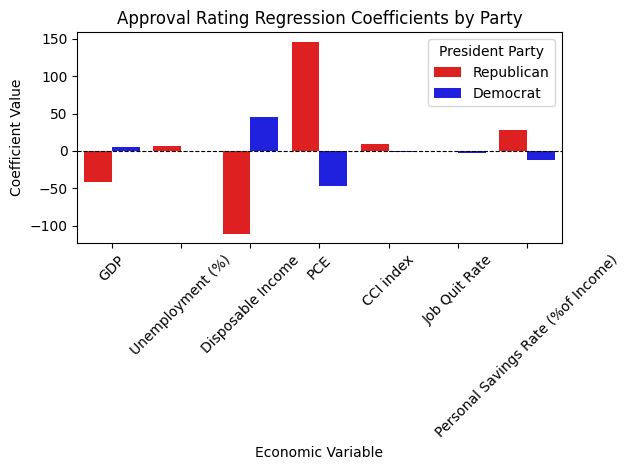

In [ ]:
plot_df = comparison_df[~comparison_df['Variable'].str.contains("Intercept")].copy()

#cleaning up variables on display
plot_df['Clean Variable'] = plot_df['Variable'].str.replace(r'Q\("(.+?)"\)', r'\1', regex=True)

#plot coeffs between the two
party_palette = {'Democrat': 'blue', 'Republican': 'red'}

sns.barplot(
    data=plot_df,
    x='Clean Variable',
    y='Coefficient',
    hue='Party',
    palette=party_palette
)


plt.xticks(rotation=45)
plt.title('Approval Rating Regression Coefficients by Party')
plt.ylabel('Coefficient Value')
plt.xlabel('Economic Variable')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend(title='President Party')
plt.tight_layout()
plt.show()

### Statistical Parity Difference

Statistical Parity Analysis
Mean predicted approval (Democrat):   45.51
Mean predicted approval (Republican): 46.13
Statistical Parity Difference (Dem - Rep): -0.61


<ipython-input-102-3d6a8c737e59>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette=colors)


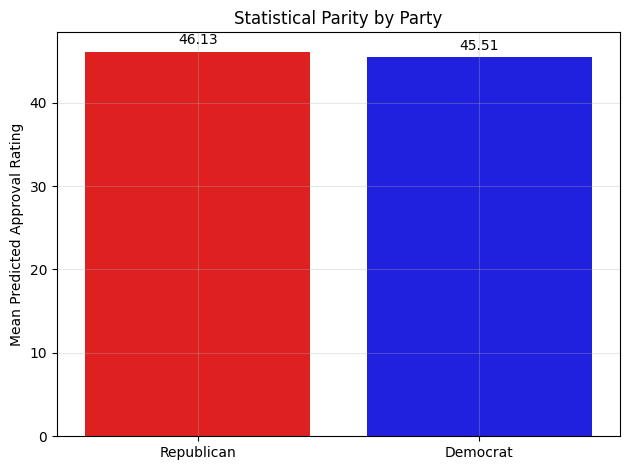

In [ ]:
#prediction on test set
y_pred = final_model_gradient_boost.predict(X_test)

# predictions as a copy
results_df = X_test.copy()
results_df['predicted_approval'] = y_pred
results_df['actual_approval'] = y_test.values
results_df['President Party'] = X_test['President Party']

#aggregate by party
group_means = results_df.groupby('President Party')['predicted_approval'].mean()

#calc parity
spd = group_means[1] - group_means[0]  # Democrat - Republican

#print results
print("Statistical Parity Analysis")
print(f"Mean predicted approval (Democrat):   {group_means[1]:.2f}")
print(f"Mean predicted approval (Republican): {group_means[0]:.2f}")
print(f"Statistical Parity Difference (Dem - Rep): {spd:.2f}")

#party labels and colors
labels = ['Republican', 'Democrat']
values = [group_means[0], group_means[1]]
colors = ['red', 'blue']

#plot with color mapping
sns.barplot(x=labels, y=values, palette=colors)
plt.ylabel('Mean Predicted Approval Rating')
plt.title('Statistical Parity by Party')
plt.grid(True, alpha=0.3)

#annotate bars
for i, val in enumerate(values):
    plt.text(i, val + 0.5, f'{val:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

SPD is negative (−0.61)

on average, your model predicts Republican presidents to have slightly higher approval ratings than Democratic ones, holding the economic features constant

subtle partisan skew in favor of Republican presidents

magnitude of 0.61 is fairly small, so while there's a directional bias, it is minor

### Equalized Odds

TPR/FPR by President Party
Republican:
  TPR: 0.89
  FPR: 0.00
  N: 29
Democrat:
  TPR: 0.50
  FPR: 0.04
  N: 29


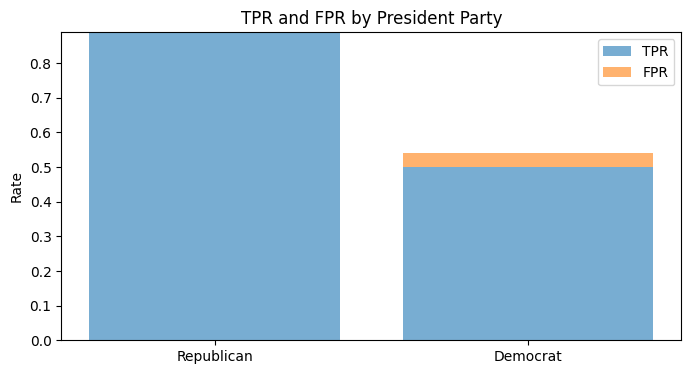

In [ ]:
#somewhat arbitrary threshold
approval_threshold = 50

#make binary
y_test_bin = (y_test > approval_threshold).astype(int)
y_pred_bin = (y_pred > approval_threshold).astype(int)

#add these to the df
results_df['actual_bin'] = y_test_bin
results_df['pred_bin'] = y_pred_bin

#for storing metrics by groups
metrics_by_group = {}

#iterate through each party
for party in [0, 1]:
    group = results_df[results_df['President Party'] == party]
    y_true = group['actual_bin']
    y_pred = group['pred_bin']

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    #tp and fp values
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0

    metrics_by_group[party] = {
        'TPR': tpr,
        'FPR': fpr,
        'Support': len(group)
    }

#look at tp/fp results by party
print("TPR/FPR by President Party")
for party, metrics in metrics_by_group.items():
    party_label = "Democrat" if party == 1 else "Republican"
    print(f"{party_label}:")
    print(f"  TPR: {metrics['TPR']:.2f}")
    print(f"  FPR: {metrics['FPR']:.2f}")
    print(f"  N: {metrics['Support']}")

tpr_vals = [metrics_by_group[0]['TPR'], metrics_by_group[1]['TPR']]
fpr_vals = [metrics_by_group[0]['FPR'], metrics_by_group[1]['FPR']]

x_labels = ['Republican', 'Democrat']

plt.figure(figsize=(8, 4))
plt.bar(x_labels, tpr_vals, alpha=0.6, label='TPR')
plt.bar(x_labels, fpr_vals, alpha=0.6, label='FPR', bottom=tpr_vals)
plt.ylabel("Rate")
plt.title("TPR and FPR by President Party")
plt.legend()
plt.show()


Model almost always correct identifies popular republican candidates but does not on democratic candidates.

Equalized odds is violated.